In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [53]:
import warnings 
warnings.filterwarnings('ignore')

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
le = LabelEncoder()
ohe = OneHotEncoder()
scaler = RobustScaler()

In [55]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

### Data Exploration

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
def drop_cols(df, cols_to_drop):
    df = df.drop(cols_to_drop, axis=1)
    return df

In [58]:
non_informative_cols = ['PassengerId', 'Name']
train_df = drop_cols(train_df, non_informative_cols)
test_df = drop_cols(test_df, non_informative_cols)

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [61]:
train_df = drop_cols(train_df, 'Cabin')
test_df = drop_cols(test_df, 'Cabin')

In [62]:
def encode_sex(df):
    df['Male'] = le.fit_transform(df.Sex)
    df = df.drop(['Sex'], axis=1)
    return df

In [63]:
train_df = encode_sex(train_df)
test_df = encode_sex(test_df)

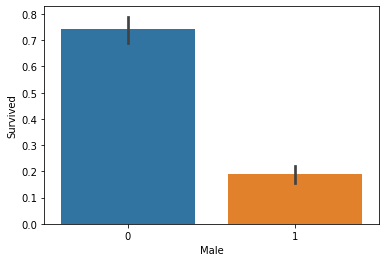

In [64]:
sns.barplot(x=train_df.Male, y=train_df.Survived)
plt.show()

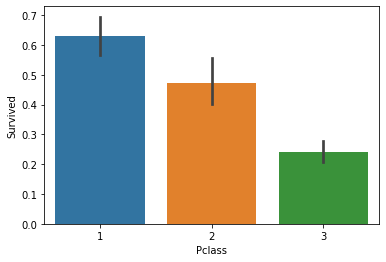

In [65]:
sns.barplot(x=train_df.Pclass, y=train_df.Survived)
plt.show()

In [66]:
train_df.corr().abs()['Age'].sort_values(ascending=False)

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Male        0.093254
Survived    0.077221
Name: Age, dtype: float64

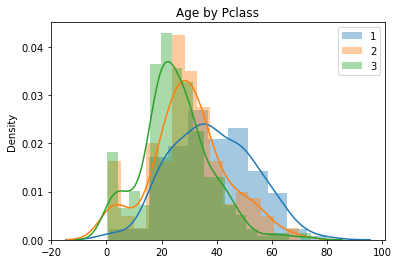

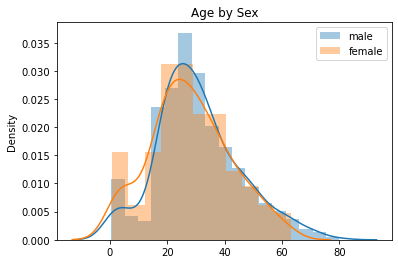

In [67]:
sns.distplot(x=train_df[train_df.Pclass == 1].Age, label='1')
sns.distplot(x=train_df[train_df.Pclass == 2].Age, label='2')
sns.distplot(x=train_df[train_df.Pclass == 3].Age, label='3')
plt.legend()
plt.title('Age by Pclass')
plt.show()

sns.distplot(x=train_df[train_df.Male == 1].Age, label='male')
sns.distplot(x=train_df[train_df.Male == 0].Age, label='female')
plt.legend()
plt.title('Age by Sex')
plt.show()

In [68]:
def imputation_by_group(df, column_to_impute, columns_to_group_by):
    """Impute the column_to_impute by taking the median group on columns_to_group_by"""
    df[column_to_impute] = df.groupby(columns_to_group_by)[column_to_impute].apply(lambda x: x.fillna(x.median()))
    return df 

In [69]:
train_df = imputation_by_group(train_df, 'Age', ['Pclass', 'Male'])
test_df = imputation_by_group(test_df, 'Age', ['Pclass', 'Male'])

In [70]:
train_df.corr().abs()['Fare'].sort_values(ascending=False)

Fare        1.000000
Pclass      0.549500
Survived    0.257307
Parch       0.216225
Male        0.182333
SibSp       0.159651
Age         0.122692
Name: Fare, dtype: float64

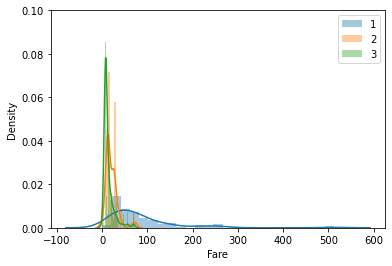

In [71]:
#sns.distplot(train_df.Fare, label='Total')
sns.distplot(train_df[train_df.Pclass == 1].Fare, label='1')
sns.distplot(train_df[train_df.Pclass == 2].Fare, label='2')
sns.distplot(train_df[train_df.Pclass == 3].Fare, label='3')
plt.legend()
plt.ylim(0,0.1)
plt.show()

In [72]:
train_df = imputation_by_group(train_df, 'Fare', 'Pclass')
test_df = imputation_by_group(test_df, 'Fare', 'Pclass')

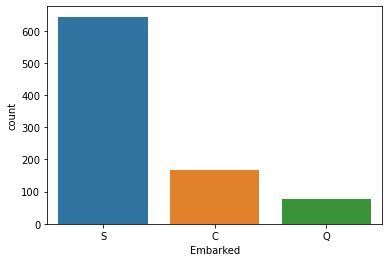

In [73]:
sns.countplot(x=train_df.Embarked)
plt.show()

In [74]:
def fill_categorical_most_common(df, column_to_fill):
    """Fill nulls in categorical column_to_fill with the most common variable"""
    most_common = df[column_to_fill].mode()[0]
    df[column_to_fill] = df[column_to_fill].fillna(most_common)
    return df

In [75]:
train_df = fill_categorical_most_common(train_df, 'Embarked')
test_df = fill_categorical_most_common(test_df, 'Embarked')

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Male      891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Ticket    418 non-null    object 
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Male      418 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 24.6+ KB


In [78]:
train_df.Ticket.value_counts()

CA. 2343         7
347082           7
1601             7
CA 2144          6
347088           6
                ..
A.5. 18509       1
13049            1
349203           1
W./C. 6609       1
S.O./P.P. 751    1
Name: Ticket, Length: 681, dtype: int64

In [79]:
def one_hot_encoding(df, col_to_encode):
    """One hot encodes categorical variable col_to_encode and drops the least common column"""
    result = ohe.fit_transform(df[col_to_encode].values.reshape(-1,1)).toarray()

    feature_names = ohe.get_feature_names().tolist()
    df[feature_names] = pd.DataFrame(result, index=df.index)

    least_common = df[col_to_encode].value_counts().index[-1]
    col_to_drop = 'x0_'+least_common
    df = df.drop([col_to_encode, col_to_drop], axis=1)

    return df 

In [80]:
train_df = one_hot_encoding(train_df, 'Embarked')
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Male,x0_C,x0_S
0,0,3,22.0,1,0,A/5 21171,7.2500,1,0.0,1.0
1,1,1,38.0,1,0,PC 17599,71.2833,0,1.0,0.0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0,1.0
3,1,1,35.0,1,0,113803,53.1000,0,0.0,1.0
4,0,3,35.0,0,0,373450,8.0500,1,0.0,1.0


In [81]:
train_df = drop_cols(train_df, 'Ticket')
test_df = drop_cols(test_df, 'Ticket')

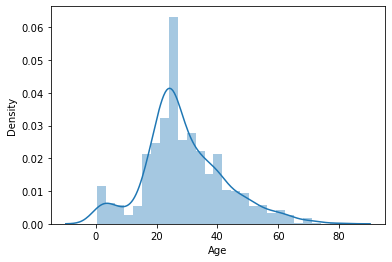

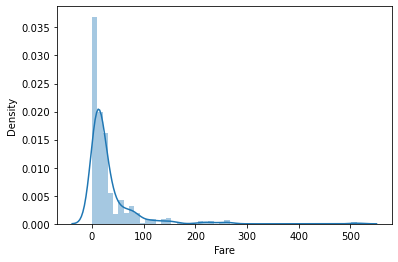

In [82]:
sns.distplot(train_df.Age)
plt.show()
sns.distplot(train_df.Fare)
plt.show()

In [110]:
def robust_scaling(df, col_to_scale):
    df[col_to_scale] = scaler.fit_transform(df[col_to_scale].values.reshape(-1,1))
    return df

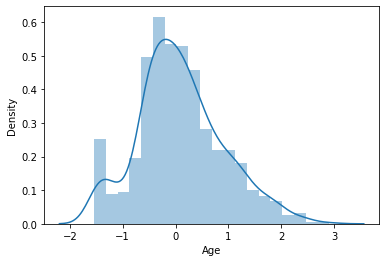

In [98]:
sns.distplot(robust_scaling(train_df, 'Age')['Age'])
plt.show()

In [111]:
robust_scaling(train_df, 'Age')['Age'].isna().sum()

177

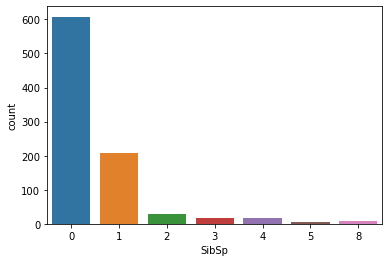

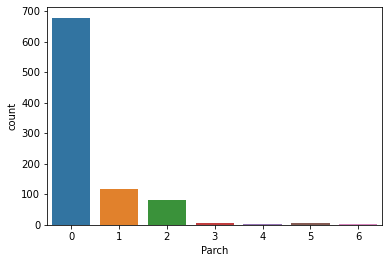

In [86]:
sns.countplot(train_df.SibSp)
plt.show()
sns.countplot(train_df.Parch)
plt.show()

In [87]:
def binary_binning(df, col_to_bin):
    """Takes col_to_bin and creates binary count for 0 or 1+"""
    correction = lambda x: 1 if x != 0 else 0
    df[col_to_bin] = df[col_to_bin].apply(correction)
    return df

In [88]:
binary_binning(train_df, 'SibSp')

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,x0_C,x0_S
0,0,3,-0.275862,1,0,7.2500,1,0.0,1.0
1,1,1,0.827586,1,0,71.2833,0,1.0,0.0
2,1,3,0.000000,0,0,7.9250,0,0.0,1.0
3,1,1,0.620690,1,0,53.1000,0,0.0,1.0
4,0,3,0.620690,0,0,8.0500,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0.068966,0,0,13.0000,1,0.0,1.0
887,1,1,-0.482759,0,0,30.0000,0,0.0,1.0
888,0,3,-0.310345,1,2,23.4500,0,0.0,1.0
889,1,1,0.000000,0,0,30.0000,1,1.0,0.0


### Data Preprocessing

In [112]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [113]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [115]:
# def drop_cols(df, cols_to_drop):
#     df = df.drop(cols_to_drop, axis=1)
#     return df

# def encode_sex(df):
#     df['Male'] = le.fit_transform(df.Sex)
#     df = df.drop(['Sex'], axis=1)
#     return df

# def imputation_by_group(df, column_to_impute, columns_to_group_by):
#     """Impute the column_to_impute by taking the median group on columns_to_group_by"""
#     df[column_to_impute] = df.groupby(columns_to_group_by)[column_to_impute].apply(lambda x: x.fillna(x.median()))
#     return df 

# def fill_categorical_most_common(df, column_to_fill):
#     """Fill nulls in categorical column_to_fill with the most common variable"""
#     most_common = df[column_to_fill].mode()[0]
#     df[column_to_fill].fillna(most_common)
#     return df

# def one_hot_encoding(df, col_to_encode):
#     """One hot encodes categorical variable col_to_encode and drops the least common column"""
#     result = ohe.fit_transform(df[col_to_encode].values.reshape(-1,1)).toarray()

#     feature_names = ohe.get_feature_names().tolist()
#     df[feature_names] = pd.DataFrame(result, index=df.index)

#     least_common = df[col_to_encode].value_counts().index[-1]
#     col_to_drop = 'x0_'+least_common
#     df = df.drop([col_to_encode, col_to_drop], axis=1)

#     return df 

# def standard_scaling(df, col_to_scale):
#     df[col_to_scale] = scaler.fit_transform(train_df[col_to_scale].values.reshape(-1,1))
#     return df

# def binary_binning(df, col_to_bin):
#     """Takes col_to_bin and creates binary count for 0 or 1+"""
#     correction = lambda x: 1 if x != 0 else 0
#     df[col_to_bin] = df[col_to_bin].apply(correction)
#     return df

In [116]:
def preprocessing(df):
    """Preprocesses data as per data exploration and returns x and y"""
    non_informative_cols = ['PassengerId', 'Name', 'Ticket']
    df = drop_cols(df, non_informative_cols)

    mostly_null_cols = ['Cabin']
    df = drop_cols(df, mostly_null_cols)

    df = encode_sex(df)

    df = imputation_by_group(df, 'Age', ['Pclass', 'Male'])
    df = imputation_by_group(df, 'Fare', 'Pclass')

    df = fill_categorical_most_common(df, 'Embarked')

    df = one_hot_encoding(df, 'Embarked')

    df = robust_scaling(df, 'Age')
    df = robust_scaling(df, 'Fare')

    df = binary_binning(df, 'SibSp')
    df = binary_binning(df, 'Parch')

    try:
        y = df.Survived
        x = df.drop('Survived', axis=1)
        return x, y 
    except AttributeError:
        return df 

In [117]:
train_x, train_y = preprocessing(train_df)
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Male    891 non-null    int32  
 6   x0_C    891 non-null    float64
 7   x0_S    891 non-null    float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 52.3 KB


In [118]:
train_y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [119]:
test_x = preprocessing(test_df)
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   Male    418 non-null    int32  
 6   x0_C    418 non-null    float64
 7   x0_S    418 non-null    float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 24.6 KB


### Training Model

In [142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [129]:
def train_model(model, x, y):
    model.fit(x,y)
    return model

In [141]:
from sklearn.model_selection import train_test_split

In [155]:
def split_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    return x_train, x_test, y_train, y_test

In [156]:
x_train, x_test, y_train, y_test = split_data(train_x, train_y)

In [157]:
logreg = train_model(logreg, x_train, y_train)

In [158]:
print(train_x.columns)
print(logreg.coef_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'x0_C', 'x0_S'], dtype='object')
[[-1.17481061 -0.52499585 -0.01064134  0.01316941 -0.00564531 -2.41840866
   0.09354605 -0.29378715]]


### Model Evaluation

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve

In [165]:
def evaluate_model(model, x, y):
    x_train, x_test, y_train, y_test = split_data(train_x, train_y)
    y_pred = model.predict(x_test)

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.show()

    plot_roc_curve(model, x, y)
    plt.show()

    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

    return accuracy_score(y_test, y_pred)
    

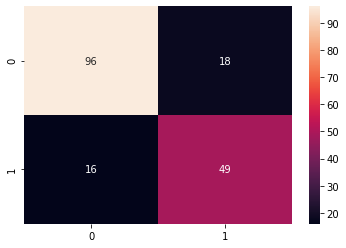

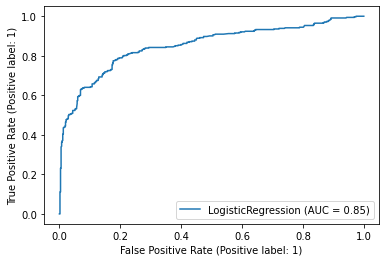

Accuracy Score: 0.8100558659217877


In [166]:
logreg_accuracy = evaluate_model(logreg, train_x, train_y)